Ho va Ten: Ly Hoang Thuan
MSSV : 19522315

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import load_model, Model
import tensorflow as tf
import keras

class LeNetCNN:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    C1 = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)
    C3 = Conv2D(16, (3, 3), padding='same', activation='relu')(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(C3)

    flat = Flatten()(S4)
    # These like ANN
    F5 = Dense(120, activation='relu', use_bias=True)(flat)
    F6 = Dense(84, activation='relu', use_bias=True)(F5)
    output = Dense(10, activation='softmax', use_bias=True)(F6) # y~ output
    self.model = Model(input, output)
  
  # Train the model
  def train(self, x_train, y_train, x_val, y_val): # x_train chinh la X, y_train chinh la ground-truth
    sgd = keras.optimizers.SGD(learning_rate=0.01)
    adam = keras.optimizers.Adam(learning_rate=0.01)
    self.model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)



In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Add, AveragePooling2D
from keras.models import load_model, Model
#from keras.objectives import categorical_crossentropy

class DeltaCNN:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    
    C1 = Conv2D(8, (3, 3), padding='same', activation='relu')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)

    C3 = Conv2D(8, (3, 3), padding='same', activation='relu')(S2)
    C4 = Conv2D(8, (3, 3), padding='same', activation='relu')(C3)
    C5 = Add()([C4, S2])

    C6 = Conv2D(16, (3, 3), strides = (2,2), padding='same', activation='relu')(C5)
    C7 = Conv2D(16, (3, 3), padding='same', activation='relu')(C6)
    C8 = Conv2D(16, (3, 3), padding='same', activation='relu')(C7)
    C9 = Add()([C8, C6])

    P10 = AveragePooling2D()(C9)
    flat = Flatten()(P10)
    F0 = Dense(400, use_bias=True)(flat)
    output = Dense(10, activation='softmax', use_bias=True)(F0)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics=['accuracy'])
  
  # Train the model
  def train(self, x_train, y_train, x_val, y_val): # x_train chinh la X, y_train chinh la ground-truthewedsdAQ  a QA
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
from collections import Counter

In [5]:
counter = Counter(y_train).most_common(3)

In [6]:
counter

[(1, 6742), (7, 6265), (3, 6131)]

In [7]:
import numpy as np

def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  for i in range(y.shape[0]):
    oh[i, int(y[i])]=1
  return oh

In [8]:
import numpy as np
def norm_zero_one(x_train):
  min_val = np.min(x_train)
  max_val = np.max(x_train)
  x_train_norm = (x_train-min_val)/(max_val-min_val)
  return x_train_norm

def norm_normal_dist(x_train):
  mean_val = np.mean(x_train)
  std_val = np.std(x_train)
  x_train_norm = (x_train-mean_val)/std_val
  return x_train_norm

In [9]:
from sklearn import preprocessing
import numpy as np

#enc = preprocessing.OneHotEncoder()

#enc.fit(y_train)

#y_train_oh = enc.transform(y_train).toarray()
#y_train_oh.shape
y_train_oh = onehot(y_train)
y_train_oh.shape

y_test_oh = onehot(y_test)
y_test_oh.shape

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

#x_train_norm = x_train_norm[:,:,:, np.newaxis] # Optional: Convert 60000x28x28 -> 60000x28x28x1
#x_test_norm = x_test_norm[:,:,:, np.newaxis] # Optional: Convert 60000x28x28 -> 60000x28x28x1

In [10]:
x_train_norm.shape

(60000, 28, 28)

In [11]:
cnn = DeltaCNN()
cnn.build((28, 28, 1))
cnn.summary()
cnn.train(x_train_norm, y_train_oh, x_test_norm, y_test_oh)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 8)    80          ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 14, 14, 8)    0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 14, 14, 8)    584         ['max_pooling2d[0][0]']          
                                                                                              

In [12]:
cnn.save('bien-chung-lenet.h5')

In [13]:
import matplotlib.pyplot as plt


313/313 [==============================] - 1s 2ms/step


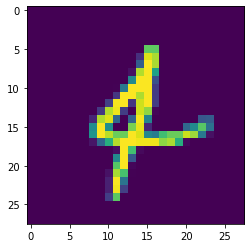

Predicted label:  4
Ground-truth label:  4


In [14]:
new_cnn = DeltaCNN()

new_cnn.load('bien-chung-lenet.h5')
pred = new_cnn.predict(x_test_norm)
index = 300
plt.imshow(x_test[index])
plt.show()
print('Predicted label: ', np.argmax(pred[index]))
print('Ground-truth label: ', y_test[index])

313/313 [==============================] - 1s 2ms/step


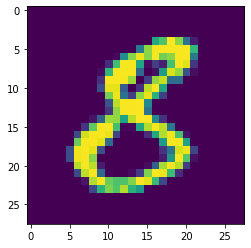

Predicted label:  8
Ground-truth label:  8


In [15]:
import matplotlib.pyplot as plt

pred = cnn.predict(x_test_norm)
test_index = 1234
plt.imshow(x_test[test_index])
plt.show()
print('Predicted label: ', np.argmax(pred[test_index]))
print('Ground-truth label: ', y_test[test_index])

313/313 [==============================] - 1s 3ms/step


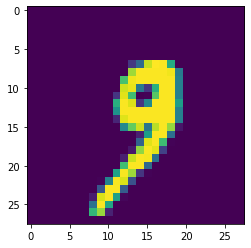

Predicted label:  9
Ground-truth label:  9


In [17]:
# Demo using a pretrained CNN model
cnn = LeNetCNN()
cnn.load('/content/bien-chung-lenet.h5')

pred = cnn.predict(x_test_norm)
plt.imshow(x_test[1000])
plt.show()
print('Predicted label: ', np.argmax(pred[1000]))
print('Ground-truth label: ', y_test[1000])

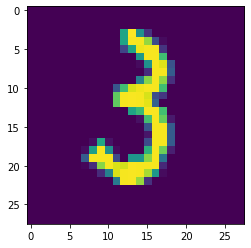

Label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [18]:
import matplotlib.pyplot as plt

# Visualize training data
plt.imshow(x_train[1234])
plt.show()
print('Label: ', y_train_oh[1234])

In [20]:
pred_label = cnn.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


In [70]:
from sklearn.metrics import f1_score

# Remove activation func

In [21]:
class No_Activation_CNN:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    
    C1 = Conv2D(8, (3, 3), padding='same', activation=None)(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)

    C3 = Conv2D(8, (3, 3), padding='same', activation=None)(S2)
    C4 = Conv2D(8, (3, 3), padding='same', activation=None)(C3)
    C5 = Add()([C4, S2])

    C6 = Conv2D(16, (3, 3), strides = (2,2), padding='same', activation=None)(C5)
    C7 = Conv2D(16, (3, 3), padding='same', activation=None)(C6)
    C8 = Conv2D(16, (3, 3), padding='same', activation=None)(C7)
    C9 = Add()([C8, C6])

    P10 = AveragePooling2D()(C9)
    flat = Flatten()(P10)
    F0 = Dense(400, use_bias=True)(flat)
    output = Dense(10, activation='softmax', use_bias=True)(F0)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics=['accuracy'])
  
  # Train the model
  def train(self, x_train, y_train, x_val, y_val): # x_train chinh la X, y_train chinh la ground-truthewedsdAQ  a QA
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

In [22]:
no_activation = No_Activation_CNN()
no_activation.build((28, 28, 1))
no_activation.summary()
no_activation.train(x_train_norm, y_train_oh, x_test_norm, y_test_oh)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 28, 28, 8)    80          ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 14, 14, 8)   0           ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 14, 14, 8)    584         ['max_pooling2d_1[0][0]']        
                                                                                            

In [71]:
from sklearn.metrics import confusion_matrix

#Predict
y_prediction = no_activation.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [72]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [73]:
import numpy as np
rounded_labels=np.argmax(y_prediction, axis=1)
rounded_labels

array([7, 8, 8, ..., 4, 8, 6])

In [74]:
result = confusion_matrix(y_test, rounded_labels)

In [75]:
import seaborn as sns

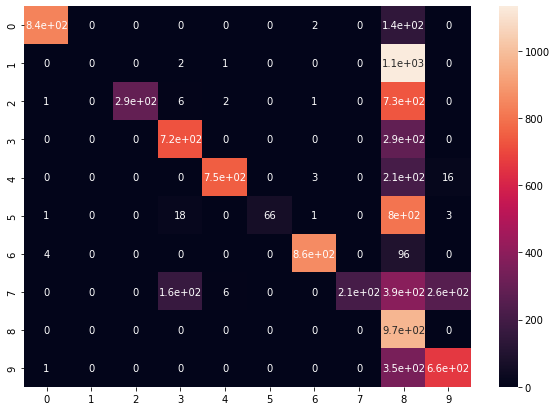

In [76]:
plt.figure(figsize = (10,7))
sns.heatmap(result, annot=True)
plt.show()

In [78]:
f1 = f1_score(y_test, rounded_labels, average=None)

In [79]:
f1

array([0.9171695 , 0.        , 0.43754731, 0.75259875, 0.86222732,
       0.13778706, 0.94130554, 0.34059726, 0.31976362, 0.67936181])

# No Conv

In [54]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Add, AveragePooling2D
from keras.models import load_model, Model
#from keras.objectives import categorical_crossentropy

class No_Conv_CNN:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
  
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(input)

    C5 = Add()([S2])

    P10 = AveragePooling2D()(C5)
    flat = Flatten()(P10)
    F0 = Dense(400, use_bias=True)(flat)
    output = Dense(10, activation='softmax', use_bias=True)(F0)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics=['accuracy'])
  
  # Train the model
  def train(self, x_train, y_train, x_val, y_val): # x_train chinh la X, y_train chinh la ground-truthewedsdAQ  a QA
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

In [56]:
no_conv = No_Conv_CNN()
no_conv.build((28, 28, 1))
no_conv.summary()
no_conv.train(x_train_norm, y_train_oh, x_test_norm, y_test_oh)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 1)        0         
 2D)                                                             
                                                                 
 add_6 (Add)                 (None, 14, 14, 1)         0         
                                                                 
 average_pooling2d_3 (Averag  (None, 7, 7, 1)          0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 49)                0         
                                                                 
 dense_6 (Dense)             (None, 400)               2000

In [66]:
y_prediction = no_conv.predict(x_test)
rounded_labels=np.argmax(y_prediction, axis=1)
result = confusion_matrix(y_test, rounded_labels)
f1 = f1_score(y_test, rounded_labels,average=None)
f1

313/313 [==============================] - 1s 3ms/step


array([0.9296606 , 0.00176056, 0.69068323, 0.78388677, 0.78107944,
       0.05452563, 0.90391841, 0.74652148, 0.35693215, 0.66666667])

# Bỏ hết Pooling layer

In [57]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Add, AveragePooling2D
from keras.models import load_model, Model
#from keras.objectives import categorical_crossentropy

class No_Pooling_CNN:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    
    C1 = Conv2D(8, (3, 3), padding='same', activation='relu')(input)

    C3 = Conv2D(8, (3, 3), padding='same', activation='relu')(C1)
    C4 = Conv2D(8, (3, 3), padding='same', activation='relu')(C3)
    C5 = Add()([C4])

    C6 = Conv2D(16, (3, 3), strides = (2,2), padding='same', activation='relu')(C5)
    C7 = Conv2D(16, (3, 3), padding='same', activation='relu')(C6)
    C8 = Conv2D(16, (3, 3), padding='same', activation='relu')(C7)
    C9 = Add()([C8, C6])

    flat = Flatten()(C9)
    F0 = Dense(400, use_bias=True)(flat)
    output = Dense(10, activation='softmax', use_bias=True)(F0)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics=['accuracy'])
  
  # Train the model
  def train(self, x_train, y_train, x_val, y_val): # x_train chinh la X, y_train chinh la ground-truthewedsdAQ  a QA
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

In [58]:
no_pooling = No_Pooling_CNN()
no_pooling.build((28, 28, 1))
no_pooling.summary()
no_pooling.train(x_train_norm, y_train_oh, x_test_norm, y_test_oh)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 28, 28, 8)    80          ['input_5[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 28, 28, 8)    584         ['conv2d_18[0][0]']              
                                                                                                  
 conv2d_20 (Conv2D)             (None, 28, 28, 8)    584         ['conv2d_19[0][0]']              
                                                                                            

In [67]:
#Predict
y_prediction = no_pooling.predict(x_test)
rounded_labels=np.argmax(y_prediction, axis=1)
result = confusion_matrix(y_test, rounded_labels)

313/313 [==============================] - 1s 2ms/step


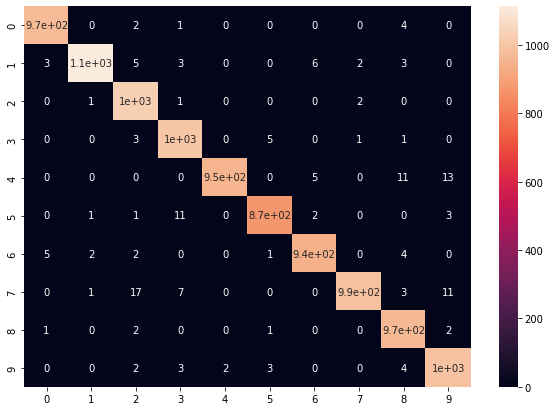

In [68]:
plt.figure(figsize = (10,7))
sns.heatmap(result, annot=True)
plt.show()

In [69]:
f1 = f1_score(y_test, rounded_labels,average=None)
f1

array([0.99184506, 0.98801598, 0.98185291, 0.98231827, 0.98399587,
       0.98423423, 0.98590078, 0.97823937, 0.98174442, 0.97884899])

# Danh gia



*   Không có Conv F1 score:

[0.9296606 , 0.00176056, 0.69068323, 0.78388677, 0.78107944,
       0.05452563, 0.90391841, 0.74652148, 0.35693215, 0.66666667]
       => Performance vô cùng thấp dù khi train (loss: 0.3763 - accuracy: 0.8857 - val_loss: 0.3652 - val_accuracy: 0.8898) kết quả khá tốt. một số class hầu như không được predict và nhầm hẳn sang class khác
*   No pooling F1 Score: [0.99184506, 0.98801598, 0.98185291, 0.98231827, 0.98399587, 0.98423423, 0.98590078, 0.97823937, 0.98174442, 0.97884899] Performace ~ 98% đều đưa ra đúng kết quả.

*   Không có activation Function: F1 score [0.9171695 , 0.        , 0.43754731, 0.75259875, 0.86222732, 0.13778706, 0.94130554, 0.34059726, 0.31976362, 0.67936181] 

=> performance tệ nhất, và các class như 1, 2
, 5, 7, 9 hầu như không thế phân loại đúng

